# Machine Learning Coursework 

For the coursework, please make sure to implement your own code and not use libraries (except where explicitly asked). You will need to present your own code that performs nested cross-validation and the k-nearest neighbour algorithm, build confusion matrices, and estimate distances between data samples.

The purpose of this coursework is to help you:
- Get familiar with **common python modules / functions** used for ML in python
- Get practical experience **implementing** ML methods in python  
- Get practical experience regarding **parameter selection** for ML methods
- Get practical experience on **evaluating** ML methods and applying cross-validation

Notes:
- don't use libraries that implement kNN or cross-validation.  We want to see your code!
- Remember to comment all of your code (see here for tips: https://stackabuse.com/commenting-python-code/). You can also make use of Jupyter Markdown, where appropriate, to improve the layout of your code and documentation.
- Please add docstrings to all of your functions (so that users can get information on inputs/outputs and what each function does by typing SHIFT+TAB over the function name. For more detail on python docstrings, see here: https://numpydoc.readthedocs.io/en/latest/format.html)
- When a question allows a free-form answer (e.g. what do you observe?), create a new markdown cell below and answer the question in the notebook. 
- Always save your notebook when you are done (this is not automatic)!
- Upload your completed notebook using the VLE

Plagiarism: please make sure that the material you submit has been created by you. Any sources you use for code should be properly referenced. Your code will be checked for plagiarism using appropriate software.

### Marking 

The grades in this coursework are allocated approximately as follows:

|                                                    | mark  |  
|----------------------------------------------------|-------|
| Data exploration (+ 2 questions)                   | 9     |  
| Code, docu. & comments (KNN + Evaluation + NCV)    | 12    |  
| Results (KNN folds + Summary + Confusion matrices) | 9     |  
| Final questions:                                   | 9     |  
| Overall quality & use of Markdown                  | 6     |  
| Total available                                    |**45** |  


## 1. Exploratory Data Analysis [9 pts]

In this coursework we are going to be working with the **Wine** dataset. This is a 178 sample dataset that categorises 3 different types of Italian wine using 13 different features. The code below loads the Wine dataset and selects a subset of features for you to work with. 

In [ ]:
# set matplotlib backend to inline
%matplotlib inline 

# import modules
from sklearn import datasets 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd

# load data
wine=datasets.load_wine()
# print(wine.DESCR)
# display(wine)

# this dataset has 13 features, we will only choose a subset of these
df_wine = pd.DataFrame(wine.data, columns = wine.feature_names )
selected_features = ['alcohol','flavanoids','color_intensity','ash']

# extract the data as numpy arrays of features, X, and target, y
X = df_wine[selected_features].values
y = wine.target


### 1.1. Visualising the data

The first part of tackling any ML problem is visualising the data in order to understand some of the properties of the problem at hand.  When there are only a small number of classes and features, it is possible to use scatter plots to visualise interactions between different pairings of features. 

The following image shows what such a visualisation might look like on the Iris dataset that you worked on during the Topic exercises. 

![image.png](attachment:image.png)

Your first task is to recreate a similar grid for the **Wine** dataset, with each off-diagonal subplot showing the interaction between two features, and each of the classes represented as a different colour. The on-diagonal subplots (representing a single feature) should show a distribution (or histogram) for that feature.     



In [ ]:
# here we converted the X from array to dataframe to facilitate the addition of the noisy data to the original dataset
df_wine=df_wine[selected_features]
df_wine['target']=y

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


You should create a function that, given data X and labels y, plots this grid.  The function should be invoked something like this:
        
    myplotGrid(X,y,...)
    
where X is your training data and y are the labels (you may also supply additional optional arguments). You can use an appropriate library to help you create the visualisation. You might want to code it yourself using matplotlib functions scatter and hist - however, this is not strictly necessary here, so try not spend too much time on this. 

In [ ]:
# define plotting function
import seaborn as sns
def myplotGrid(X,y,diag_kind='auto',kind='scatter',markers=['o','o','o'],corner=False,x_vars=[],y_vars=[],height=2.5):
  """
  myplotGrid() is a function that is used to plot pairwise relationships between the variables of the passed dataset in the form of a grid. 
  It is based internally on pairplot() from seaborn library and takes as inputs the following parameters
  # Parameters
  ----------
  X : dataset of type dataframe
  y : target label of the dataset of type string and can be used as hue
  diag_kind : how the diagonal will be plotted {'auto', 'hist', 'kde', None} of type string
  kind : kind of the plot for the whole grid {'scatter', 'kde', 'hist', 'reg'} of type string
  markers : the shape of the scatterplot would be either a single marker of a specific shape or list of markers but if it's a
  list so its length must be equivalent to the number of the labels in the hue variable and they will be colored differently
  corner : it's a bool variable. if it's true so it won't show the upper triangle of the grid
  x_vars : list of variables within the dataset that represents the rows of the figure  
  y_vars : list of variables within the dataset that represents the columns of the figure
  height : the height of the grid of type integer 

  # Returns
  ------------------
  grid 
  """
  if isinstance(X, pd.DataFrame) and isinstance(y, str):
    sns.pairplot(X,hue=y,diag_kind=diag_kind,kind=kind,markers=markers,corner=corner,height=height)

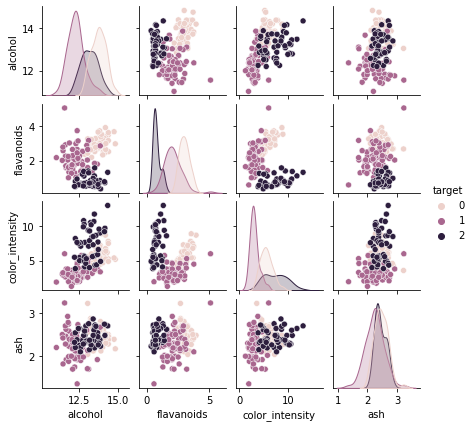

In [ ]:
# run the plotting function
myplotGrid(df_wine,'target',height=1.5)

### 1.2. Exploratory Data Analysis under noise

When data are collected under real-world settings they usually contain some amount of noise that makes classification more challenging. In the cell below, invoke your exploratory data analysis function above on a noisy version of your data X.

Try to perturb your data with some Gaussian noise,

    # initialize random seed to replicate results over different runs
    mySeed = 12345 
    np.random.seed(mySeed) 
    XN=X+np.random.normal(0,0.5,X.shape)
    
and then invoke

    myplotGrid(XN,y)

In [ ]:
# noise code 
mySeed = 12345 
np.random.seed(mySeed) 
#dataset is the dataset that contains Guassian noise data. we took a copy of the original dataset in order to not manipulate in the original one
dataset=df_wine.copy()
# the Guassian noise data is added to the features except the target variable.
dataset['alcohol']=dataset['alcohol']+np.random.normal(0,0.5,dataset['alcohol'].shape)
dataset['flavanoids']=dataset['flavanoids']+np.random.normal(0,0.5,dataset['flavanoids'].shape)
dataset['color_intensity']=dataset['color_intensity']+np.random.normal(0,0.5,dataset['color_intensity'].shape)
dataset['ash']=dataset['ash']+np.random.normal(0,0.5,dataset['ash'].shape)
dataset

,alcohol,flavanoids,color_intensity,ash,target
0,14.127646,3.277578,5.422777,2.608897,0
1,13.439472,2.481098,3.940199,2.234325,0
2,12.900281,2.956273,5.332581,3.104708,0
3,14.092135,3.303679,8.413187,2.474666,0
4,14.222890,2.226722,4.548639,2.511818,0
...,...,...,...,...,...
173,13.275635,0.030956,7.226064,2.552324,2
174,12.793075,1.302300,7.638147,2.347007,2
175,13.034685,1.007119,9.873322,2.259886,2
176,12.710379,1.309842,8.973852,2.989726,2


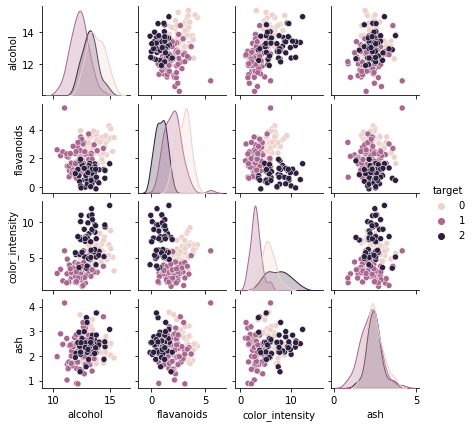

In [ ]:
# plot the grid to see the differences after adding Guassian noise data
myplotGrid(dataset,'target',height=1.5)


### Q1. Exploratory data analysis
Based on your exploratory analysis, if you were to build a classifier using only two of the available features, which ones would you choose and why?  Answer as fully as you can. 


answer:
    
  I believe that color intensity and flavanoids features give the best separation for our target variables. Thus it would be easy to apply our clustering algorithm which would give a decent prediction based on the 2 columns color intensity and flavanoids.


### Q2. Data with noise
What do you observe by plotting the data without noise compared to plotting with added Gaussian noise? 


answer:

After adding the Guassian noise to our data, the distribution of the flavanoids feature is affected and tends to be normally distributed for all the class labels followed by the alcohol feature. In the alcohol feature, the distribution of class label with value '2' is affected the most and tends to be mormally distributed as well. The rest of the features are not affected that much.



## 2. Implementing kNN [6 pts]

In the cell below, develop your own code for performing k-Nearest Neighbour classification.  You may use the scikit-learn k-NN implementation from the labs as a guide - and as a way of verifying your results - but it is important that your implementation does not use any libraries other than the basic numpy and matplotlib functions. 

Define a function that performs k-NN given a set of data.  Your function should be invoked similary to:

        y_ = mykNN(X,y,X_,options)
        
where X is your training data, y is your training outputs, X\_ are your testing data and y\_ are your predicted outputs for X\_.  The options argument (can be a list or a set of separate arguments depending on how you choose to implement the function) should at least contain the number of neighbours to consider as well as the distance function employed.

Hint: it helps to break the problem into various sub-problems, implemented as helper function. For example, you might want to implement separate function(s) for calculating the distances between two vectors. And another function that uncovers the nearest neighbour(s) to a given vector. 


In [ ]:
def train_test_split(X,y, test_size=0.25):
  """
  train_test_split() is a function that splits the dataset into training subset and testing subset with specific ratio. It takes as
  inputs the following paramters
  # Parameters
  -----------------
  X: dataset of type dataframe
  y: the target label of the dataset, of type array
  test_size: the ratio that the dataset will be splitted based on it, of type int (default value = 0.25)
  # Returns
  ------------------
  splitted_array: array that contains the training subset & testing subset 
  """
  if isinstance(test_size, float) or isinstance(test_size, int):
    # combining X with y to shuffle them randomly then assign the shuffled data, based on the ratio sent in the test_size, into training dataset
    # and testing dataset
    X['target']=y
    X=X.sample(frac=1)
    y=X['target']
    X=X.iloc[: , :-1]
    X_train=X[:-np.floor(test_size*len(X)).astype(int)]
    y_train=y[:-np.floor(test_size*len(X)).astype(int)]
    X_test=X[np.ceil((1-test_size)*len(X)).astype(int):]
    y_test=y[np.ceil((1-test_size)*len(X)).astype(int):]
    return [X_train, y_train, X_test, y_test]

X_train, y_train, X_test, y_test = train_test_split(df_wine,df_wine['target'])

In [ ]:
# helper code
def calculate_distance(point1,point2,method='euclidean'):
  """
  calculate_distance() is a function that computes the distance between two points using specific equations. 
  Whether the euclidean equation or manhattan equation.
  # Parameters
  ----------------
  point1: the first data point 
  point2: the second data point
  method: the equation used to calculate the difference between two points
  # Returns
  ------------------
  result: the distance value calculated based on the chosen equation 
  """
  method=method.lower();
  result =0
  # the equation of the euclidean distance is √Σ(Ai-Bi)2
  if method == 'euclidean':
    for i, j in zip(point1, point2):
        result+=np.square(i-j)
    return np.sqrt(result)
  # the equation of the manhattan distance is: Σ|Ai – Bi|
  if method == 'manhattan':
    for i, j in zip(point1, point2):
        result+=np.abs(i-j)
    return (result)

def mode_manual(distances):
    """
    mode_manual() is a function that gets the mode (most repeated value) in the passed array. 
    # Parameters:
    ---------------
    distances: array search in it for the mode
    # Returns
    ------------------
    mode: the value that is repeated the most  
    """
    values, counts = np.unique(distances, return_counts=True)
    index = np.argmax(counts)
    return(values[index])

In [ ]:
# mykNN code
def mykNN(X_train,y_train,X_test,k, method='Euclidean'):
  """
  mykNN() is a function that applies the KNN algorithm. It computes the distance between the test data point to be classified and the number
  of neighbours (k) then take the k neighbours that have the minimum distances with the test data point. Thus, let the test data point belong
  to the most dominant (mode) class label among the k neighbours.  
  # Parameters
  --------------------
  X_train: the splitted part of the dataset that the model will be trained on, of type dataframe
  y_train: the class label of the training dataset, of type dataframe
  X_test:  the splitted part of the dataset that the model will test it to predict its class label correctly, of type dataframe
  k: number of neighbours to take their minimum distance values, of type integer
  method: the equation used to calculate the distance, of type string
  # Returns
  ------------------
  y_predict: array of the predicted class labels 
  """
  y_predict=[]
  X_train=np.array(X_train)
  X_test=np.array(X_test)
  y_train=np.array(y_train)
  # iterate on the test data points and compare each one of them with all the training data points then save the results in a dictionary
  # that consists of the the trained points, distance values and the class labels of the trained points
  for test_point in range(len(X_test)):
    distances=[]
    for train_point in range(len(X_train)):
      dist=calculate_distance(X_train[train_point],X_test[test_point],method=method)
      distances.append((train_point,dist,y_train[train_point]))
    # sort the dictionary in descending order based on the distance values
    distances=sorted(distances,key=lambda row: row[1])[:k]
    distances=np.asarray(distances)
    # take the most dominant class label of the first k neighbours
    class_label=mode_manual(distances[:,2])
    y_predict.append((class_label))
  return y_predict

y_predict=mykNN(X_train, y_train, X_test,5)
y_predict = [int(x) for x in y_predict] 
y_predict=np.array(y_predict)
y_predict

array([0, 1, 2, 0, 2, 2, 0, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 1, 2, 1, 0,
       0, 1, 2, 0, 0, 0, 0, 0, 2, 1, 1, 0, 0, 0, 1, 1, 2, 1, 0, 2, 1, 2])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# compare our knn model with scikit learn knn model using the output of our train_test_split() function

#define knn classifier, with 5 neighbors and use the euclidian distance
knn=KNeighborsClassifier(n_neighbors=5, metric='euclidean',weights = 'uniform',algorithm='brute')
#define training and testing data, fit the classifier
knn.fit(X_train,y_train)
#predict values for test data based on training data
y_pred=knn.predict(X_test)
print((y_pred)) # predicted values

[0 1 2 0 2 2 0 1 1 1 1 1 0 0 2 0 0 0 1 2 1 0 0 1 2 0 0 0 0 0 2 1 1 0 0 0 1
 1 2 1 0 2 1 2]


## 3. Classifier evaluation [3 pts]

In the cell below, implement your own classifier evaluation code. This should include some way of calculating confusion matrices, as well as common metrics like accuracy. 

Write some additional code that lets you display the output of your confusion matrices in a useful and easy-to-read manner.

You might want to test your functions on some test data, and compare the results to the sklearn library versions. 


In [ ]:
def calculate_accuracy(y_actual,y_predict):
  """
  calculate_accuracy() is a function that computes the accuracy by comparing the predicted class labels of our model with the class labels
  of the test subset splitted before and the result is the number of correctly predicted class labels divided by the total number of the
  class labels in the test subset.
  # Parameters
  -----------------
  y_actual: the class label of the test dataset, of type dataframe
  y_predict: the class label predicted by our model, of type array

  # Returns
  --------------
  accuracy: the accuracy value
  """
  # accuracy formula is: (total number of correct predictions) / (total number of prediction)
  y_actual=np.asarray(y_actual)
  y_predict=np.asarray(y_predict)
  correct=np.equal(y_actual,y_predict)
  total=len(y_actual)
  return np.sum(correct/total)

print('accuracy: %.2f' % calculate_accuracy(y_test,y_predict))

accuracy: 0.93


In [ ]:
# confusion matrix, accuracy, precision, recall, etc.
def calculate_confusionMatrix(y_actual, y_predict):
  """
  calculate_confusionMatrix() is a function that shows the total number of true positive, true negative, false positive and false negative
  per class label in the form of a table.

  # Parameters
  ---------------
  y_actual: the class label of the test dataset, of type dataframe
  y_predict: the class label predicted by our model, of type array

  # Returns
  ----------------
  array: array that represents the number of true positive, true negative, false positive and false negative per class label 
  """
  classes=len(np.unique(y_actual))
  y_actual=np.asarray(y_actual)
  confusion_matrix=np.zeros((classes,classes),dtype=np.int)
  for i in range(len(y_actual)):
    confusion_matrix[y_actual[i],y_predict[i]]=confusion_matrix[y_actual[i],y_predict[i]]+1
  return confusion_matrix
     
cm=calculate_confusionMatrix(y_test, y_predict)
print(cm)

[[18  0  0]
 [ 1 15  2]
 [ 0  0  8]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


In [ ]:
# to be adjusted by adding some error checks for example 3shan shabah elly fel lecture wel recall bardo
def calculate_precision(y_actual,y_predict):
  """
  calculate_precision() is a function that computes the precision of each class label where the precision is the ratio between the true positives
  and all the positives, using calculate_confusionMatrix().
  # Paramters
  ------------------------
  y_actual: the class label of the test dataset, of type dataframe
  y_predict: the class label predicted by our model, of type array

  # Returns
  -----------------
  array: array that represents the precision for each class label
  """
  confusion_matrix=calculate_confusionMatrix(y_actual, y_predict)
  precision=np.zeros(len(np.unique(y_actual)))
  # the precision formula is True Positive / (True Positive + False Positive)
  for i in np.unique(y_actual):
    row_sum=np.sum(confusion_matrix[i,:])
    precision[i]=confusion_matrix[i,i]/row_sum
  return precision

precision_myKNN=calculate_precision(y_test,y_predict)
print('the precision estimated from our model ',precision_myKNN)
precision=calculate_precision(y_test,y_pred)
print('the precision estimated by scikit learn model ',precision)
# same results from both models

the precision estimated from our model  [1.         0.83333333 1.        ]
the precision estimated by scikit learn model  [1.         0.83333333 1.        ]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


In [ ]:
def calculate_recall(y_actual,y_predict):
  """
  calculate_recall() is a function that computes the recall of each class label where the recall is the measure of our model correctly
  identifying True Positives, using calculate_confusionMatrix().
  # Paramters
  ------------------------
  y_actual: the class label of the test dataset, of type dataframe
  y_predict: the class label predicted by our model, of type array

  # Returns
  -----------------
  array: array that represents the recall for each class label
  """
  confusion_matrix=calculate_confusionMatrix(y_actual, y_predict)
  precision=np.zeros(len(np.unique(y_actual)))
  # the recall formula is: True Positive / (True Positive + False Negative)
  for i in np.unique(y_actual):
    col_sum=np.sum(confusion_matrix[:,i])
    precision[i]=confusion_matrix[i,i]/col_sum
  return precision

recall_myKNN=calculate_recall(y_test,y_predict)
print('the recall estimated from our model ',recall_myKNN)
recall=calculate_recall(y_test,y_pred)
print('the recall estimated by scikit learn model ',recall)


the recall estimated from our model  [0.94736842 1.         0.8       ]
the recall estimated by scikit learn model  [0.94736842 1.         0.8       ]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


In [ ]:
# test evaluation code
# compare our model accuracy & confusion matrix with the 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
print('confusion matrix of scikit learn ')
print(confusion_matrix(y_test,y_pred))
print('accuracy of scikit learn model: %.2f' %accuracy_score(y_test,y_pred))

print('accuracy of our model: %.2f' % calculate_accuracy(y_test,y_predict))

confusion matrix of scikit learn 
[[18  0  0]
 [ 1 15  2]
 [ 0  0  8]]
accuracy of scikit learn model: 0.93
accuracy of our model: 0.93



## 4. Nested Cross-validation using your implementation of KNN  [6 pts]

In the cell below, develop your own code for performing 5-fold nested cross-validation along with your implemenation of k-NN above. You must write your own code -- the scikit-learn module may only be used for verification purposes. 

Your code for nested cross-validation should invoke your kNN function (see above). You cross validation function should be invoked similary to:

    accuracies_fold = myNestedCrossVal(X,y,5,list(range(1,11)),['euclidean','manhattan'],mySeed)
    
where X is your data matrix (containing all samples and features for each sample), 5 is the number of folds, y are your known output labels, ``list(range(1,11)`` evaluates the neighbour parameter from 1 to 10, and ``['euclidean','manhattan',...]`` evaluates the distances on the validation sets.  mySeed is simply a random seed to enable us to replicate your results.

**Notes:** 
- you should perform nested cross-validation on both your original data X, as well as the data pertrubed by noise as shown in the cells above (XN)
- you should evaluate **at least** two distance functions
- you should evaluate number of neighbours from 1 to 10
- your function should return a list of accuracies per fold
- for each **fold**, your function should print:
  - the accuracy per distinct set of parameters on the validation set
  - the best set of parameters for the fold after validation
  - the confusion matrix per fold (on the testing set)


In [ ]:
# parameters for testing code
nFolds = 5
np.random.seed(mySeed)
# Creates an array of random permutation of indices between 0 and the length of the X data.
# The indices are then split up into (folds) folds
indices = np.random.permutation(np.arange(0,len(X),1))
indices = np.array_split(indices, nFolds)    # the data after being permuted/shuffled, it's splitted then into 5 folds/bins here to start cv


In [ ]:
def myNestedCrossVal(X,y,nFolds,neighbours,distances,mySeed):
  """
  myNestedCrossVal() is a function that applies nested cross validation using KNN model where the dataset is shuffled then splitted into 5 bins.
  One bin is left as hold out/testing set and the rest 4 bins are treated as training set. Each one of the remaining training set is splitted
  into one validation set and the rest 3 sets are treated as training set and this is done inside loops that represents the hyper paramters.
  The paramters of knn are k (number of neighbours) and distance (method used to calculate the distance between tow data points). 
  The best set of parameters is determined based on the accuracy, the set of parameters that have the highest accuracy. So the first k set of 
  paramterts with the highest accuracy are fed to the hold out/testing set splitted before the this test fold is rotated to be a training fold
  and the next fold is treated as test fold and so forth. The result is 5 set of paramters and each one consists of k, distance method used and
  the accuracy.
  # Paramters
  --------------------
  X: the dataset of type array
  y: the target label of the dataset, of type array
  nFolds: number of folds that the data will be splitted based on it to testing and training sets, of type int
  neighbours: the number of neighbours, of type list
  distances: the equation used to calculate the distance between two points (euclidean or manhattan), of type array of string
  mySeed: is a random seed to be able to replicate same results every run
  # Returns:
  --------------------
  array: array that consists of accuracy values, confution matrices and dictionary of the target labels tested and predicted
  """
  accuracy_results, cm_results,y_folds=[],[],[]
  nFolds = 5
  neighbours=list(range(1,11))
  distances=['euclidean','manhattan']
  np.random.seed(mySeed)
  # Creates an array of random permutation of indices between 0 and the length of the X data.
  # The indices are then split up into (folds) folds
  indices = np.random.permutation(np.arange(0,len(X),1))
  indices = np.array_split(indices, nFolds)    # the data after being permuted/shuffled, it's splitted then into 5 folds/bins here to start cv
  for iFold in range(len(indices)):
    testFold=indices[iFold]
    remaining_folds=np.delete(indices,iFold)
    dict_fold=[] 
    for k in neighbours:
        for dist in distances:
          accuracy_values=[]    
          for train_fold in range(len(remaining_folds)):
              validation_fold=remaining_folds[train_fold]
              inner_training_folds=np.delete(remaining_folds,train_fold)
              array=[]
              for i in inner_training_folds:
                for j in i:
                  array.append(j)
              X_train_fold, y_train_fold=X[array], y[array] 
              X_validation_fold, y_validation_fold=X[validation_fold], y[validation_fold]
              y_validation_predict=mykNN(X_train_fold,y_train_fold,X_validation_fold,k, dist)
              accuracy_fold=calculate_accuracy(y_validation_fold,y_validation_predict)
              accuracy_values.append(accuracy_fold)
          dict_fold.append((k,dist,np.mean(accuracy_values)))
    dict_fold=sorted(dict_fold,key=lambda row: row[2],reverse=True)
    outer_array=[]
    for i in remaining_folds:
      for j in i:
        outer_array.append(j)
    X_train_outer_fold, y_train_outer_fold=X[outer_array], y[outer_array] 
    X_test_fold, y_test_fold=X[testFold], y[testFold]
    y_test_predict=mykNN(X_train_outer_fold,y_train_outer_fold,X_test_fold,dict_fold[:][0][0], dict_fold[:][0][1])
    y_test_predict = [int(x) for x in y_test_predict]
    accuracy_outer_fold=calculate_accuracy(y_test_fold,y_test_predict)
    confusion_matrix=calculate_confusionMatrix(y_test_fold, y_test_predict)
    y_folds.append({'y_test_fold':y_test_fold,'y_test_predict':y_test_predict})
    accuracy_results.append({'accuracy':accuracy_outer_fold,'knn':dict_fold[:][0][0],'dist':dict_fold[:][0][1]})
    cm_results.append(confusion_matrix)
  return [accuracy_results,cm_results,y_folds]

results=myNestedCrossVal(X,y,nFolds,list(range(1,11)),['euclidean','manhattan'],mySeed)
accuracies_fold=results[0]
cm_fold=results[1]
y_folds=results[2]
print(accuracies_fold)
print(cm_fold)
print(y_folds)

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


[{'accuracy': 0.9722222222222222, 'knn': 3, 'dist': 'manhattan'}, {'accuracy': 0.9444444444444444, 'knn': 3, 'dist': 'manhattan'}, {'accuracy': 0.9166666666666666, 'knn': 3, 'dist': 'manhattan'}, {'accuracy': 0.8857142857142858, 'knn': 7, 'dist': 'manhattan'}, {'accuracy': 0.942857142857143, 'knn': 1, 'dist': 'euclidean'}]
[array([[12,  0,  0],
       [ 0, 13,  1],
       [ 0,  0, 10]]), array([[14,  0,  0],
       [ 2, 13,  0],
       [ 0,  0,  7]]), array([[13,  0,  0],
       [ 3,  8,  0],
       [ 0,  0, 12]]), array([[11,  0,  0],
       [ 2, 13,  1],
       [ 0,  1,  7]]), array([[ 9,  0,  0],
       [ 1, 14,  0],
       [ 0,  1, 10]])]
[{'y_test_fold': array([1, 1, 2, 0, 2, 0, 1, 1, 2, 2, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 2, 1,
       2, 2, 1, 0, 2, 1, 2, 0, 0, 0, 2, 0, 0, 0]), 'y_test_predict': [1, 1, 2, 0, 2, 0, 1, 1, 2, 2, 1, 1, 1, 0, 0, 0, 1, 1, 1, 2, 2, 1, 2, 2, 1, 0, 2, 1, 2, 0, 0, 0, 2, 0, 0, 0]}, {'y_test_fold': array([0, 1, 2, 0, 2, 2, 0, 2, 0, 0, 1, 0, 2, 1, 0, 1, 2, 0, 1,

In [ ]:
# evaluate clean data code
clean_results=myNestedCrossVal(X,y,nFolds,list(range(1,11)),['euclidean','manhattan'],mySeed)
clean_accuracies_fold=clean_results[0]
clean_cm_fold=clean_results[1]
y_clean_folds=results[2]
print(clean_accuracies_fold)
print(clean_cm_fold)
print(y_clean_folds)

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


[{'accuracy': 0.9722222222222222, 'knn': 3, 'dist': 'manhattan'}, {'accuracy': 0.9444444444444444, 'knn': 3, 'dist': 'manhattan'}, {'accuracy': 0.9166666666666666, 'knn': 3, 'dist': 'manhattan'}, {'accuracy': 0.8857142857142858, 'knn': 7, 'dist': 'manhattan'}, {'accuracy': 0.942857142857143, 'knn': 1, 'dist': 'euclidean'}]
[array([[12,  0,  0],
       [ 0, 13,  1],
       [ 0,  0, 10]]), array([[14,  0,  0],
       [ 2, 13,  0],
       [ 0,  0,  7]]), array([[13,  0,  0],
       [ 3,  8,  0],
       [ 0,  0, 12]]), array([[11,  0,  0],
       [ 2, 13,  1],
       [ 0,  1,  7]]), array([[ 9,  0,  0],
       [ 1, 14,  0],
       [ 0,  1, 10]])]
[{'y_test_fold': array([1, 1, 2, 0, 2, 0, 1, 1, 2, 2, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 2, 1,
       2, 2, 1, 0, 2, 1, 2, 0, 0, 0, 2, 0, 0, 0]), 'y_test_predict': [1, 1, 2, 0, 2, 0, 1, 1, 2, 2, 1, 1, 1, 0, 0, 0, 1, 1, 1, 2, 2, 1, 2, 2, 1, 0, 2, 1, 2, 0, 0, 0, 2, 0, 0, 0]}, {'y_test_fold': array([0, 1, 2, 0, 2, 2, 0, 2, 0, 0, 1, 0, 2, 1, 0, 1, 2, 0, 1,

In [ ]:
# evaluate noisy  data code
XN = dataset[selected_features].values
yn = dataset.target
# print(dataset.target)
noisy_results=myNestedCrossVal(XN,yn,nFolds,list(range(1,11)),['euclidean','manhattan'],mySeed)
noisy_accuracies_fold=noisy_results[0]
noisy_cm_fold=noisy_results[1]
y_noisy_folds=results[2]
print(noisy_accuracies_fold)
print(y_noisy_folds)

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


[{'accuracy': 0.9444444444444444, 'knn': 5, 'dist': 'euclidean'}, {'accuracy': 0.9166666666666666, 'knn': 9, 'dist': 'euclidean'}, {'accuracy': 0.8888888888888888, 'knn': 5, 'dist': 'manhattan'}, {'accuracy': 0.8857142857142858, 'knn': 10, 'dist': 'euclidean'}, {'accuracy': 0.8857142857142858, 'knn': 3, 'dist': 'manhattan'}]
[{'y_test_fold': array([1, 1, 2, 0, 2, 0, 1, 1, 2, 2, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 2, 1,
       2, 2, 1, 0, 2, 1, 2, 0, 0, 0, 2, 0, 0, 0]), 'y_test_predict': [1, 1, 2, 0, 2, 0, 1, 1, 2, 2, 1, 1, 1, 0, 0, 0, 1, 1, 1, 2, 2, 1, 2, 2, 1, 0, 2, 1, 2, 0, 0, 0, 2, 0, 0, 0]}, {'y_test_fold': array([0, 1, 2, 0, 2, 2, 0, 2, 0, 0, 1, 0, 2, 1, 0, 1, 2, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 2, 1, 0, 1, 1]), 'y_test_predict': [0, 0, 2, 0, 2, 2, 0, 2, 0, 0, 1, 0, 2, 1, 0, 1, 2, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 2, 1, 0, 1, 1]}, {'y_test_fold': array([2, 2, 1, 1, 0, 1, 1, 1, 2, 1, 1, 2, 1, 2, 0, 0, 1, 0, 2, 0, 0, 0,
       2, 0, 2, 2, 0, 1, 0, 1, 2, 2, 0, 2, 0,

## 5. Summary of results [6 pts]

Using your results from above, fill out the following table using the **clean** data:


| Fold | accuracy |  k  | distance |
| --- | --- | --- | --- |
| 1 | 0.9722222222222222  |  3 | manhattan  |
| 2 | 0.9444444444444444  |  3 | manhattan  |
| 3 | 0.9166666666666666  |  3 | manhattan  |
| 4 | 0.8857142857142858  |  7 | manhattan  |
| 5 | 0.942857142857143  |  1 | euclidean  |
| **total mean** |  $\pm0.9323809523809523$  |   |    |
| **total std** | $\pm0.02921411214982312$  |   |    |


Where **total** is given as an average over all the folds, and $\pm$ the standard deviation.

Now fill out the following table using the **noisy** data:


| Fold | accuracy |  k  | distance |
| --- | --- | --- | --- |
| 1 | 0.9444444444444444  |  5 | euclidean  |
| 2 | 0.9166666666666666  |  9 | euclidean  |
| 3 | 0.8888888888888888  |  5 | manhattan  |
| 4 | 0.8857142857142858  |  10 | euclidean  |
| 5 | 0.8857142857142858  |  3 | manhattan  |
| **total mean** |  $\pm 0.9042857142857142 $  |   |    |
| **total std** |  $\pm 0.023207196041266084 $  |   |    |

In [ ]:
print('CLEAN')
clean_array=[]
for item in clean_accuracies_fold:
  for key,value in item.items():
    if key == 'accuracy':
      clean_array.append(value)

print('accuracies of clean data ',clean_array)
mean=np.mean(clean_array)
std=np.std(clean_array)
print('mean ',mean)
print('std ',std)

CLEAN
accuracies of clean data  [0.9722222222222222, 0.9444444444444444, 0.9166666666666666, 0.8857142857142858, 0.942857142857143]
mean  0.9323809523809523
std  0.02921411214982312


In [ ]:
print('NOISY')
noisy_array=[]
for item in noisy_accuracies_fold:
  for key,value in item.items():
    if key == 'accuracy':
      noisy_array.append(value)

print('accuracies of noisy data ',noisy_array)
mean=np.mean(noisy_array)
std=np.std(noisy_array)
print('mean ',mean)
print('std ',std)

NOISY
accuracies of noisy data  [0.9444444444444444, 0.9166666666666666, 0.8888888888888888, 0.8857142857142858, 0.8857142857142858]
mean  0.9042857142857142
std  0.023207196041266084


### 5.2. Confusion matrix summary

Summarise the overall results of your nested cross validation evaluation of your K-NN algorithm using two summary confusion matrices (one for the noisy data, one for the clean data). You might want to adapt your ```myNestedCrossVal``` code above to also return a list of confusion matrices.

Use or adapt your evaluation code above to print the two confusion matrices below. Make sure you label the matrix rows and columns. You might also want ot show class-relative precision and recall. 


In [ ]:
print('CLEAN')
# clean data summary results
y_test_clean_array,y_predict_clean_array=[],[]
for item in y_clean_folds:
  for key,value in item.items():
    if key == 'y_test_fold':
      y_test_clean_array.append(value)
    if key == 'y_test_predict':
      y_predict_clean_array.append(value)

y_test_clean_flatten_array=[]
for i in y_test_clean_array:
  for j in i:
      y_test_clean_flatten_array.append(j)

y_predict_clean_flatten_array=[]
for i in y_predict_clean_array:
  for j in i:
      y_predict_clean_flatten_array.append(j)   

clean_confusion_matrix=calculate_confusionMatrix(y_test_clean_flatten_array, y_predict_clean_flatten_array)
print('clean_confusion_matrix ',clean_confusion_matrix)
clean_precision=calculate_precision(y_test_clean_flatten_array,y_predict_clean_flatten_array)
print('clean_precision ',clean_precision)
clean_recall=calculate_recall(y_test_clean_flatten_array,y_predict_clean_flatten_array)
print('clean_recall ',clean_recall)
print('clean_accuracy: %.3f' % calculate_accuracy(y_test_clean_flatten_array,y_predict_clean_flatten_array))

CLEAN
clean_confusion_matrix  [[59  0  0]
 [ 8 61  2]
 [ 0  2 46]]
clean_precision  [1.         0.85915493 0.95833333]
clean_recall  [0.88059701 0.96825397 0.95833333]
clean_accuracy: 0.933


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


In [ ]:
print('NOISY')
# noisy data summary results
y_test_noisy_array,y_predict_noisy_array=[],[]
for item in y_noisy_folds:
  for key,value in item.items():
    if key == 'y_test_fold':
      y_test_noisy_array.append(value)
    if key == 'y_test_predict':
      y_predict_noisy_array.append(value)

y_test_noisy_flatten_array=[]
for i in y_test_noisy_array:
  for j in i:
      y_test_noisy_flatten_array.append(j)

y_predict_noisy_flatten_array=[]
for i in y_predict_noisy_array:
  for j in i:
      y_predict_noisy_flatten_array.append(j)   

noisy_confusion_matrix=calculate_confusionMatrix(y_test_noisy_flatten_array, y_predict_noisy_flatten_array)
print('noisy_confusion_matrix ',noisy_confusion_matrix)
noisy_precision=calculate_precision(y_test_noisy_flatten_array,y_predict_noisy_flatten_array)
print('noisy_precision ',noisy_precision)
noisy_recall=calculate_recall(y_test_noisy_flatten_array,y_predict_noisy_flatten_array)
print('noisy_recall ',noisy_recall)
print('noisy_accuracy: %.3f' % calculate_accuracy(y_test_noisy_flatten_array,y_predict_noisy_flatten_array))

NOISY
noisy_confusion_matrix  [[59  0  0]
 [ 8 61  2]
 [ 0  2 46]]
noisy_precision  [1.         0.85915493 0.95833333]
noisy_recall  [0.88059701 0.96825397 0.95833333]
noisy_accuracy: 0.933


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


## 6. More questions [9 pts]

Now answer the following questions as fully as you can. The answers should be based on your implementation above. Write your answers in the Markdown cells below each question.



### Q3.	 Influence of noise
Do the best parameters change when noise is added to the data? Can you say that one parameter choice is better regardless of the data used? 


Answer:

Yes, the best parameters set did change when the noisy data is added. 

Regardless the data used, whether clean or noisy data, all the accuracies are above 85% which is good enough but the best set of params exists in the clean dataset which is {'accuracy': 0.9722222222222222, 'knn': 3, 'dist': 'manhattan'} since it has the highest accuracy among the rest of the sets.

### Q4. Tie break
Assume that you have selected the number of neighbours to be an even number, e.g., 2. For one of the neighbours, the suggested class is 1, and for the other neighbour the suggested class is 2. How would you break the tie? Write example pseudocode that does this.

Answer:

This could be done by assigning weight for each class label (voting) and based on this voting we can assign to the new data point the class
label that has the highest vote. There are many ways to compute the vote for each class label and here is mine





In [ ]:
#  For i in range(len(K)), where k is the number of neighbours
    
#     votes[i]= 1/distances[i], where distances is all the minimum istances we got after computing them for the k input

#      total += votes[i]

#  return votes /= total 

After the distances have been computed in myKNN(), add the above code to get the class label with the highest vote, instead of getting the mode
of the class labels.

---



### Q5.	Beyond Wine 
If you were to run your k-nn algorithm on a new dataset (e.g., the breast cancer dataset, or Iris), what considerations would you need to take into consideration? Outline any changes that might be needed to your code. 


Answer:


After the visualisations made at the beginning, will do more data pre-processing and EDA. Starting by applying correlation to see the relationship between the variables and if any feature is dependent on another so we can ignore one of them. Then do feature selection by applying ANOVA test or Kendall's rank coefficient on numerical features so the features with less contribution in predicting the target will be eliminated. In addition, scale the dataset by letting it vary within specific range (0,1) in order to not let any feature with high range of values have the highest influence in predicting the target. Therefore, apply our model k-fold nested cross validation using knn and evaluate its results with the evaluation methods made above. Finally the visualisation made at the beginning could help us to see the distribution of each feature and determine if the data is imbalanced or not, if so we can apply some balancing techniques such as over or under sampling. Then comapre our model results before and after applying the balancing techniques.

# References:


Sucky, R., 2022. Pair plot and PairGrid in Details | by Rashida Nasrin Sucky | Towards Data Science. [online] Mirror-medium.com. Available at: <https://mirror-medium.com/?m=https%3A%2F%2Fmedium.com%2Fm%2Fglobal-identity%3FredirectUrl%3Dhttps%253A%252F%252Ftowardsdatascience.com%252Fpair-plot-and-pairgrid-in-details-f782975032ea&fbclid=IwAR1nBMTnH9nWtHju2fZgzuMW1muq_pqNEpVmZXmcAELagfVkX6BPcIZ9e3U> [Accessed 4 July 2022].

Koehrsen, W., 2022. Visualizing Data with Pairs Plots in Python. [online] Medium. Available at: <https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166?fbclid=IwAR0GGGGthLNyefXRwsLPJ5fdUVRkoGCFRJ5F17Ju3qvMa_B-s3ztcIlIwIA> [Accessed 4 July 2022].

Zin, P., 2022. Nested Cross-Validation & Cross-Validation Series – Part 3 - Phyo Phyo Kyaw Zin. [online] Phyo Phyo Kyaw Zin. Available at: <https://drzinph.com/nested-cross-validation-cross-validation-series-part-3/?fbclid=IwAR31Q9z5t3EmRFQCPqgAeXiH9leYh6nL9wXG6Vfu2F9st3wt7CTrb3tmwJI> [Accessed 4 July 2022].

Hansen, C., 2022. Nested Cross-Validation Python Code. [online] Machine Learning From Scratch. Available at: <https://mlfromscratch.com/nested-cross-validation-python-code/?fbclid=IwAR0pRnQRIFneYcO-MQL1dAJDo5zNj9kseOVnqlgmFi_dCpcK5Hh43eh2GYA#/> [Accessed 4 July 2022].

Zoltan, C., 2022. KNN in Python. [online] Available at: <https://mirror-medium.com/?m=https%3A%2F%2Ftowardsdatascience.com%2Fknn-in-python-835643e2fb53&fbclid=IwAR2NsxssXDqtS-KOf_GWHAsr9VHro-wncXTW57FQlTBiL9LT_hzFUzFWwyY> [Accessed 4 July 2022].

Akiode, A., 2022. K-Fold CV on Imbalance Classification Data | Analytics Vidhya. [online] Mirror-medium.com. Available at: <https://mirror-medium.com/?m=https%3A%2F%2Fmedium.com%2Fanalytics-vidhya%2Fhow-to-carry-out-k-fold-cross-validation-on-an-imbalanced-classification-problem-6d3d942a8016%3Ffbclid%3DIwAR3KckYxo_MJh40jXyy4YS-b1IdUMCqj0Yfh21rSXQVV3nlS4XLlvcuvwcc&fbclid=IwAR2lOmDRjV9TAanq46Lc-PJED1961Q_9rNiOYpwsZXgk-_ihJZpU8aao_oc> [Accessed 4 July 2022].



McCaffrey, J., 2022. Weighted k-NN Classification Using Python -- Visual Studio Magazine. [online] Visual Studio Magazine. Available at: <https://visualstudiomagazine.com/articles/2019/04/01/weighted-k-nn-classification.aspx?fbclid=IwAR0KvwU7RfcBdHT3bqtafaLkTOhR2N_8ulLbXTyygjoiN5mKr2eB-BPP_t8#:~:text=The%20weighted%20k%2Dnearest%20neighbors,or%20more%20numeric%20predictor%20variables> [Accessed 4 July 2022].

Brownlee, J., 2022. How To Implement Machine Learning Metrics From Scratch in Python. [online] Machine Learning Mastery. Available at: <https://machinelearningmastery.com/implement-machine-learning-algorithm-performance-metrics-scratch-python/?fbclid=IwAR0KvwU7RfcBdHT3bqtafaLkTOhR2N_8ulLbXTyygjoiN5mKr2eB-BPP_t8> [Accessed 4 July 2022].

Jayanth Sri Ram, K., 2022. How to split data into training and testing in Python without sklearn. [online] CodeSpeedy. Available at: <https://www.codespeedy.com/split-data-into-training-and-testing-in-python-without-sklearn/?fbclid=IwAR09kBy20nsKHwW7tQi43ByubrIZBnK0JWve9Rn46uSz3bNUqqXba0ezjaI> [Accessed 4 July 2022].


Zach, 2022. How to Calculate Manhattan Distance in Python (With Examples). [online] Statology. Available at: <https://www.statology.org/manhattan-distance-python/?fbclid=IwAR1nBMTnH9nWtHju2fZgzuMW1muq_pqNEpVmZXmcAELagfVkX6BPcIZ9e3U> [Accessed 4 July 2022].



Zach, 2022. How to Calculate Euclidean Distance in Python (With Examples) - Statology. [online] Statology. Available at: <https://www.statology.org/euclidean-distance-python/?fbclid=IwAR2lOmDRjV9TAanq46Lc-PJED1961Q_9rNiOYpwsZXgk-_ihJZpU8aao_oc> [Accessed 4 July 2022].

